In [8]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm

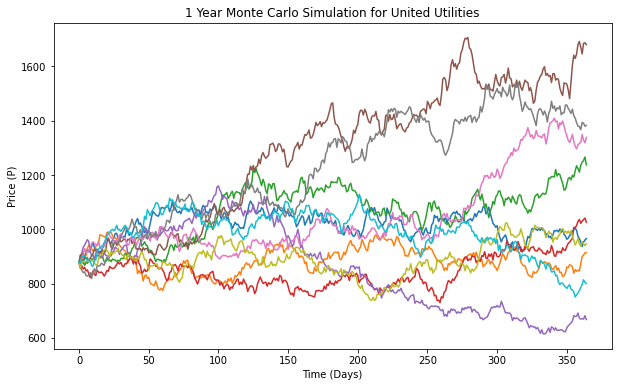

In [12]:
def get_simulation(ticker, name):
    data = pd.DataFrame()
    data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']
    log_returns = np.log(1 + data.pct_change())

    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (0.5 * var)
    stdev = log_returns.std()
    t_intervals = 365
    iterations = 10
    daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
    S0 = data.iloc[-1]
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]
    plt.figure(figsize=(10,6))
    plt.title("1 Year Monte Carlo Simulation for " + name)
    plt.ylabel("Price (P)")
    plt.xlabel("Time (Days)")
    plt.plot(price_list);
    plt.savefig('tempplot.png')
    plt.show()
    
get_simulation("UU.L", "United Utilities")
